## 房屋价格预测  

In [4]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
plt.style.use ("fivethirtyeight")
%matplotlib inline
#导入数据
data = pd.read_csv("C:/Users/Java02-张凌云/Desktop/house_price.csv")
data.head(3)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996


In [10]:
# 查看基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [11]:
#查看数据缺失情况
data.isnull().sum().sort_values(ascending=False)

Elevator      8237
Year             0
Size             0
Renovation       0
Region           0
Price            0
Layout           0
Id               0
Garden           0
Floor            0
District         0
Direction        0
dtype: int64

In [12]:
#查看统计信息
data.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [13]:
# 移除多余字段 id
data = data.drop(["Id"],axis=1)

In [16]:
# 插入一条字段 房屋的均价
df = data.copy()
df["PerPrice"] = data["Price"] / data["Size"]
print(df.shape)
df.head()

(23677, 12)


,Direction,District,Elevator,Floor,Garden,Layout,Price,Region,Renovation,Size,Year,PerPrice
0,东西,灯市口,NaN,6,锡拉胡同21号院,3室1厅,780.0,东城,精装,75.0,1988,10.400000
1,南北,东单,无电梯,6,东华门大街,2室1厅,705.0,东城,精装,60.0,1988,11.750000
2,南西,崇文门,有电梯,16,新世界中心,3室1厅,1400.0,东城,其他,210.0,1996,6.666667
3,南,崇文门,NaN,7,兴隆都市馨园,1室1厅,420.0,东城,精装,39.0,2004,10.769231
4,南,陶然亭,有电梯,19,中海紫御公馆,2室2厅,998.0,东城,精装,90.0,2010,11.088889


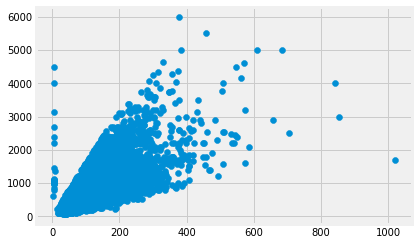

In [17]:
# 房屋的大小与价格的关系
# 横轴为Size
plt.scatter(df["Size"],df["Price"])

In [18]:
# 查看面积小于10的数据
df.loc[df["Size"]<10]

,Direction,District,Elevator,Floor,Garden,Layout,Price,Region,Renovation,Size,Year,PerPrice
1168,240.97平米,长阳,毛坯,5,世茂维拉,叠拼别墅,1080.0,房山,南北,5.0,2015,216.000000
1458,242.78平米,长阳,毛坯,5,世茂维拉,叠拼别墅,1100.0,房山,南北,5.0,2015,220.000000
1797,242.96平米,长阳,精装,5,世茂维拉,叠拼别墅,980.0,房山,南北,5.0,2015,196.000000
2268,295.88平米,顺义其它,精装,4,龙湖好望山,叠拼别墅,1000.0,顺义,南北,4.0,2014,250.000000
2274,295.01平米,顺义其它,精装,4,鹭峯国际,叠拼别墅,1450.0,顺义,南北,5.0,2014,290.000000
2276,292.31平米,顺义其它,毛坯,3,龙湖好望山,叠拼别墅,860.0,顺义,南北,4.0,2014,215.000000
2432,294.42平米,顺义其它,精装,5,龙湖好望山,叠拼别墅,980.0,顺义,南北,6.0,2013,163.333333
4078,427.5平米,西红门,精装,3,鸿坤林语墅,叠拼别墅,3150.0,大兴,南北,4.0,2015,787.500000
4079,361.8平米,西红门,精装,4,鸿坤林语墅,叠拼别墅,2380.0,大兴,南北,4.0,2015,595.000000
4761,386.83平米,西红门,精装,3,鸿坤林语墅,叠拼别墅,2700.0,大兴,南北,5.0,2015,540.000000


In [19]:
# 查看面积小于10的数据的个数
len(df.loc[df["Size"]<10])

20

In [21]:
# 移除特殊的数据
df = df[(df["Layout"] != "叠拼别墅")&(df["Size"]<1000)]

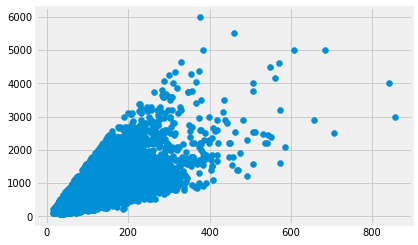

In [22]:
plt.scatter(df["Size"],df["Price"])

In [23]:
# 查看Layout特征分布
df["Layout"].value_counts()

2室1厅      9485
3室1厅      3999
3室2厅      2765
1室1厅      2681
2室2厅      1671
4室2厅       930
1室0厅       499
4室1厅       295
5室2厅       200
2房间1卫      170
1房间1卫      146
3房间1卫      116
4室3厅        96
5室3厅        75
1室2厅        67
6室2厅        59
3房间2卫       53
2室0厅        50
3室3厅        43
4房间2卫       31
3室0厅        29
6室3厅        29
5室1厅        27
2房间2卫       18
4房间1卫       15
1房间0卫       14
5房间2卫       10
7室3厅         7
4房间3卫        7
7室2厅         6
5房间3卫        6
2室3厅         5
6室4厅         4
8室3厅         4
4室4厅         4
5室4厅         4
8室2厅         3
4室0厅         3
6房间4卫        3
3房间0卫        3
2房间0卫        2
6房间3卫        2
3房间3卫        2
6室0厅         2
1房间2卫        2
7房间2卫        1
5室0厅         1
1室3厅         1
6室1厅         1
7室1厅         1
9室1厅         1
11房间3卫       1
5房间0卫        1
9室2厅         1
8室5厅         1
6室5厅         1
6房间5卫        1
9室3厅         1
8室4厅         1
Name: Layout, dtype: int64

In [27]:
# 提取室和厅重新创建特征
# 将房间替换为室
df["Layout"] = df["Layout"].apply(lambda x:x.replace("房间","室"))
print(df["Layout"].value_counts())

2室1厅     9485
3室1厅     3999
3室2厅     2765
1室1厅     2681
2室2厅     1671
4室2厅      930
1室0厅      499
4室1厅      295
5室2厅      200
2室1卫      170
1室1卫      146
3室1卫      116
4室3厅       96
5室3厅       75
1室2厅       67
6室2厅       59
3室2卫       53
2室0厅       50
3室3厅       43
4室2卫       31
6室3厅       29
3室0厅       29
5室1厅       27
2室2卫       18
4室1卫       15
1室0卫       14
5室2卫       10
4室3卫        7
7室3厅        7
5室3卫        6
7室2厅        6
2室3厅        5
5室4厅        4
4室4厅        4
8室3厅        4
6室4厅        4
4室0厅        3
6室4卫        3
3室0卫        3
8室2厅        3
3室3卫        2
1室2卫        2
6室0厅        2
2室0卫        2
6室3卫        2
5室0厅        1
11室3卫       1
5室0卫        1
8室5厅        1
6室1厅        1
7室1厅        1
9室2厅        1
7室2卫        1
1室3厅        1
9室3厅        1
9室1厅        1
6室5卫        1
6室5厅        1
8室4厅        1
Name: Layout, dtype: int64


G:\Anaconda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# 创建室为特征的
df["室"] = df["Layout"].apply(lambda x:x.split('室')[0])
df = df.drop(["Layout"],axis=1)
print(df["室"].value_counts())

KeyError: 'Layout'